# Problem for HW7

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from frake import GraphFunctions as GF
import os
import seaborn as sns
import pumat

## Generate the set of tests required

1. Set of stresses: 10, 20, 40 Kpa under drained triaxial.
2. Mtc= 1.2, Dmin=-0.5, -0.25, -0.1
3. Set h=15, 20, 25.

In [36]:
Sig=[[-10, -10, -10, 0, 0, 0], [-20, -20, -20, 0, 0, 0], [-40, -40, -40, 0, 0, 0]]
dEps=25
Dmins=[-0.8, -0.4, -0.2]
hs=[30, 25, 20]
erate=0.000000000001

Load_batch=pumat.LoadBatch('MyBatch')
for i in range(len(Sig)):
    Load_defi=pumat.loading(drain=True, load=-dEps/100)#loading prams
    Load_batch.add_load(Load_defi)#Loading batch
    Io=100000000
    impact_sims=pumat.NAMCVMAT_Run(Sig[i], 2000, 0.2, 1.2, 0.4, Dmins[i], hs[i], 0, Load_batch,\
                                  Dpart=0.32e-3, Gs=2.86, refrate=Io, foldername='sims',\
                                  outputfile='output_%s' %i, Plot=False)
    Load_batch.delete_loads()

#************************************************
impact_sims[0].head()#inspect results

C:\Users\$r.984804\Documents\GitHub\CIE365-Soil-mechanics\Shear_strength\examples
C:\Users\$r.984804\Documents\GitHub\CIE365-Soil-mechanics\Shear_strength\examples\sims\incrementalDriver.exe
C:\Users\$r.984804\Documents\GitHub\CIE365-Soil-mechanics\Shear_strength\examples
C:\Users\$r.984804\Documents\GitHub\CIE365-Soil-mechanics\Shear_strength\examples\sims\incrementalDriver.exe
C:\Users\$r.984804\Documents\GitHub\CIE365-Soil-mechanics\Shear_strength\examples
C:\Users\$r.984804\Documents\GitHub\CIE365-Soil-mechanics\Shear_strength\examples\sims\incrementalDriver.exe


,time(1),time(2),stran(1),stran(2),stran(3),stran(4),stran(5),stran(6),stress(1),stress(2),...,F1_max,F2_max,Rn_max,F0_last,F0_max,Epsa,q,p,Epsq,Epsv
0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,-10.000000,-10.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.000,0.000000,10.000000,0.000000,-0.000000
1,10000.0,10000.0,-0.00025,0.000050,0.000050,0.0,0.0,0.0,-11.200000,-10.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.025,1.200000,10.400000,0.020000,0.015000
2,110000.0,110000.0,-0.00275,0.000550,0.000550,0.0,0.0,0.0,-23.200000,-10.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.275,13.200000,14.400000,0.220000,0.165000
3,210000.0,210000.0,-0.00525,0.001323,0.001323,0.0,0.0,0.0,-31.064718,-9.999986,...,0.000138,0.000281,0.000107,5.247873e-09,0.071359,0.525,21.064731,17.021564,0.438203,0.260392
4,310000.0,310000.0,-0.00775,0.002554,0.002554,0.0,0.0,0.0,-33.474988,-10.000016,...,0.000303,0.000613,0.000090,1.338339e-09,0.067340,0.775,23.474973,17.825007,0.686958,0.264125


C:\ProgramData\Anaconda3\lib\site-packages\frake\GraphFunctions.py:73: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']
C:\ProgramData\Anaconda3\lib\site-packages\frake\GraphFunctions.py:73: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']


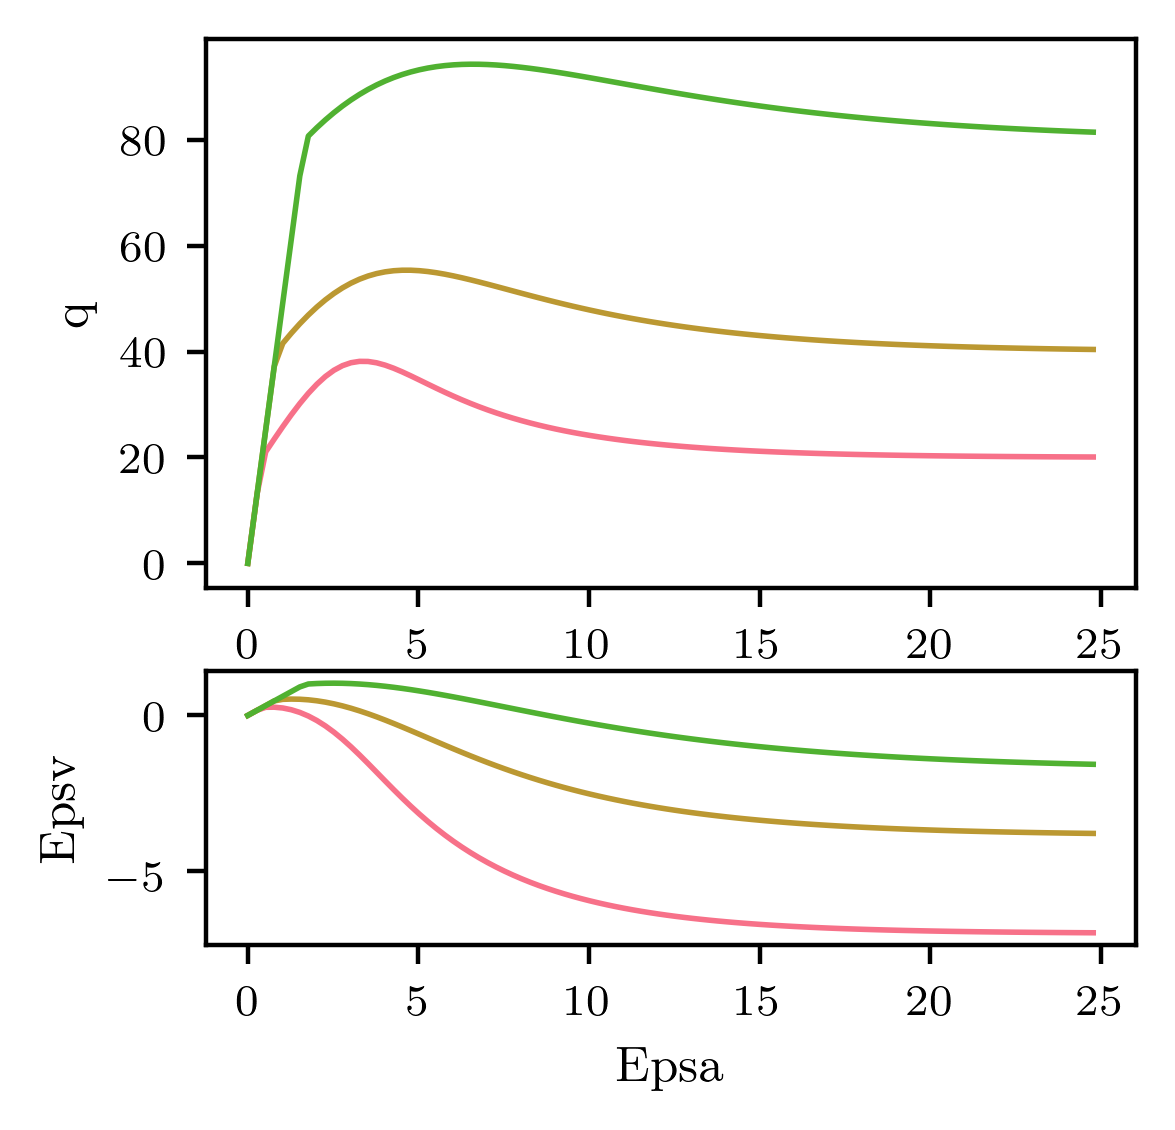

In [37]:
fig, axs=plt.subplots(2, gridspec_kw={'height_ratios':[2, 1]})

GF.PlotAll(impact_sims, ['10', '20', '40'], 'Epsa', 'q', PlotName=axs[0], hold=1, legendMode=False)
GF.PlotAll(impact_sims, ['10', '20', '40'], 'Epsa', 'Epsv', PlotName=axs[1], hold=1, legendMode=False)

## Now add noise to data

In [38]:
for frame in impact_sims:
    n=len(frame['q'])
    noise1 = np.random.normal(0,1,n)
    noise2 = np.random.normal(0,0.5,n)
    noise3 = np.random.normal(0,0.1,n)
    #epsa=noise1+frame['Epsa']
    #frame['Epsa']=epsa
    qs=noise2+frame['q']
    frame['q']=qs
    epsv=noise3+frame['Epsv']
    frame['Epsv']=epsv
    

C:\ProgramData\Anaconda3\lib\site-packages\frake\GraphFunctions.py:73: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']
C:\ProgramData\Anaconda3\lib\site-packages\frake\GraphFunctions.py:73: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']


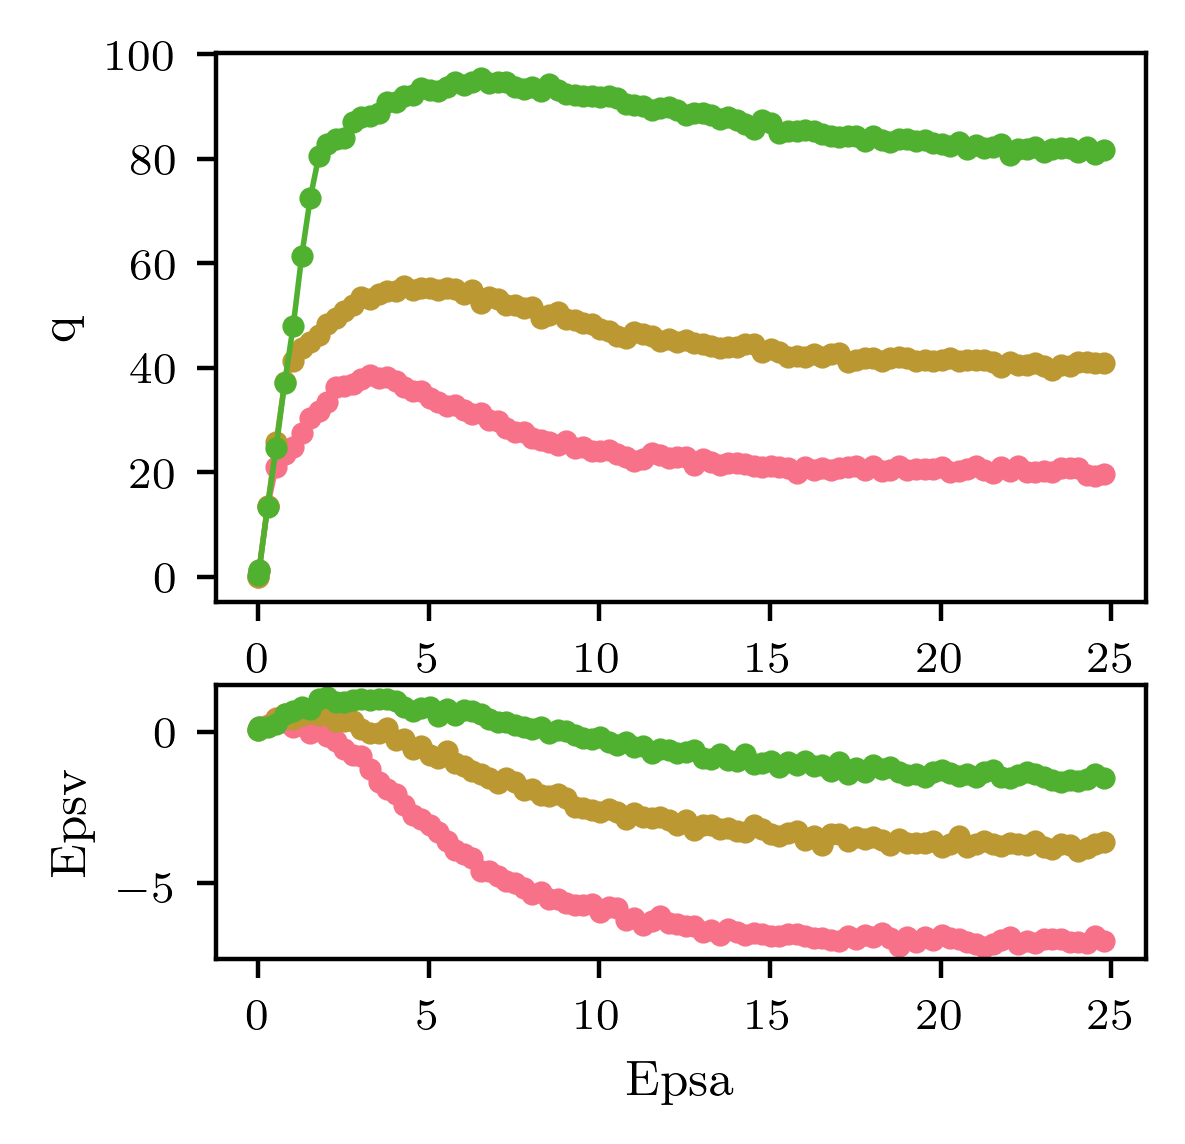

In [41]:
fig, axs=plt.subplots(2, gridspec_kw={'height_ratios':[2, 1]})

GF.PlotAll(impact_sims, ['10', '20', '40'], 'Epsa', 'q', PlotName=axs[0], hold=1, legendMode=False, mode='.-')
GF.PlotAll(impact_sims, ['10', '20', '40'], 'Epsa', 'Epsv', PlotName=axs[1], hold=1, legendMode=False, mode='.-')

In [42]:
from frake import FileFunctions as FF

In [44]:
FF.SaveasCsv(impact_sims, ['10', '20', '40'])